# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

In [104]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split
import warnings

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

The objective is to advise the business owner what features consumers value in used cars so they can inform their inventory decision making. Leveraging a dataset that includes used car prices along with various features, we will develop a predictive model with the goal of establishing a relationship between the input features and the target variable, price. The deliverable will provide actionable insights for the business owner to understand the vehicle pricing market.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [105]:
cars = pd.read_csv('vehicles.csv')
cars.head(50)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
5,7222379453,hudson valley,1600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
6,7221952215,hudson valley,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
7,7220195662,hudson valley,15995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
8,7209064557,medford-ashland,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,or
9,7219485069,erie,3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pa


In [106]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [107]:
nan_counts = cars.isna().sum()


print(nan_counts)

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64


### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

Dropped region column because it included city names, state names, nonsensical names, and I felt 'state' captured that geographical feature. I dropped size because 3/4 of values missing and 'type' captured what I wanted for car. Dropped VIN because not relevant.
I dropped all the rows with NaN in each of the 'year', 'manufacturer', 'model', 'condition' columns.


In [108]:
# unique_values = cars['model'].unique()
# print(unique_values.count())
unique_values = cars['condition'].unique()
print(unique_values)

[nan 'good' 'excellent' 'fair' 'like new' 'new' 'salvage']


In [109]:
# Find model average price before dropping
average_price_by_model = cars.groupby('model')['price'].mean()
average_price_by_model_df = average_price_by_model.reset_index()
print(average_price_by_model_df)




                                                   model         price
0                                                    "t"  27000.000000
1                                                 #NAME?  16492.073171
2      $362.47, $1000 down, oac, 2.9%apr $362.47,luxu...  24900.000000
3                                                      %   1000.000000
4                                               & altima   3045.000000
...                                                  ...           ...
29644                               ♦ALL TADES WELCOME!♦    500.000000
29645                                                  ♿  10999.000000
29646                                              ♿ vmi  10997.000000
29647                               𝓜𝓮𝓻𝓬𝓮𝓭𝓮𝓼 𝓫𝓮𝓷𝔃 𝓶𝓵 350   3900.000000
29648                        🔥GMC Sierra 1500 SLE🔥 4X4 🔥   9999.000000

[29649 rows x 2 columns]


In [110]:
cars = cars.drop(['id', 'region', 'VIN', 'size', 'model'], axis=1)

In [111]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         426880 non-null  int64  
 1   year          425675 non-null  float64
 2   manufacturer  409234 non-null  object 
 3   condition     252776 non-null  object 
 4   cylinders     249202 non-null  object 
 5   fuel          423867 non-null  object 
 6   odometer      422480 non-null  float64
 7   title_status  418638 non-null  object 
 8   transmission  424324 non-null  object 
 9   drive         296313 non-null  object 
 10  type          334022 non-null  object 
 11  paint_color   296677 non-null  object 
 12  state         426880 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 42.3+ MB


In [127]:
#drop nan values
cars2 = cars.dropna()
cars2.info()
cars2.head()

<class 'pandas.core.frame.DataFrame'>
Index: 117169 entries, 31 to 426878
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         117169 non-null  int64  
 1   year          117169 non-null  float64
 2   manufacturer  117169 non-null  object 
 3   condition     117169 non-null  object 
 4   cylinders     117169 non-null  object 
 5   fuel          117169 non-null  object 
 6   odometer      117169 non-null  float64
 7   title_status  117169 non-null  object 
 8   transmission  117169 non-null  object 
 9   drive         117169 non-null  object 
 10  type          117169 non-null  object 
 11  paint_color   117169 non-null  object 
 12  state         117169 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 12.5+ MB


,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
31,15000,2013.0,ford,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,al
32,27990,2012.0,gmc,good,8 cylinders,gas,68696.0,clean,other,4wd,pickup,black,al
33,34590,2016.0,chevrolet,good,6 cylinders,gas,29499.0,clean,other,4wd,pickup,silver,al
34,35000,2019.0,toyota,excellent,6 cylinders,gas,43000.0,clean,automatic,4wd,truck,grey,al
35,29990,2016.0,chevrolet,good,6 cylinders,gas,17302.0,clean,other,4wd,pickup,red,al


In [128]:
#ordinal encode 'condition'


# If there are any NaN values after mapping, you may want to handle them
# For example, replacing NaN with a default value like 0


cars2.head(20)



,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
31,15000,2013.0,ford,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,al
32,27990,2012.0,gmc,good,8 cylinders,gas,68696.0,clean,other,4wd,pickup,black,al
33,34590,2016.0,chevrolet,good,6 cylinders,gas,29499.0,clean,other,4wd,pickup,silver,al
34,35000,2019.0,toyota,excellent,6 cylinders,gas,43000.0,clean,automatic,4wd,truck,grey,al
35,29990,2016.0,chevrolet,good,6 cylinders,gas,17302.0,clean,other,4wd,pickup,red,al
36,38590,2011.0,chevrolet,good,8 cylinders,gas,30237.0,clean,other,rwd,other,red,al
38,32990,2017.0,jeep,good,6 cylinders,gas,30041.0,clean,other,4wd,other,silver,al
42,37990,2016.0,chevrolet,good,8 cylinders,gas,9704.0,clean,other,rwd,coupe,red,al
45,27990,2018.0,nissan,good,6 cylinders,gas,37332.0,clean,other,4wd,pickup,silver,al
55,19900,2004.0,ford,good,8 cylinders,diesel,88000.0,clean,automatic,4wd,pickup,blue,al


In [129]:
# One hot encode other columns
columns_to_encode = ['manufacturer', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color', 'state']
cars3 = pd.get_dummies(cars2, columns=columns_to_encode, dummy_na=True)
cars3.head()

,price,year,odometer,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,...,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy,state_nan
31,15000,2013.0,128000.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
32,27990,2012.0,68696.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
33,34590,2016.0,29499.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
34,35000,2019.0,43000.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
35,29990,2016.0,17302.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [130]:
#create new age column
cars3['age'] = 2024 - cars3['year']
cars3['age'].head()

31    11.0
32    12.0
33     8.0
34     5.0
35     8.0
Name: age, dtype: float64

In [131]:
#drop year column
cars3 = cars3.drop('year', axis=1)
cars3.head(10)

,price,odometer,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,...,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy,state_nan,age
31,15000,128000.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,11.0
32,27990,68696.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,12.0
33,34590,29499.0,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,8.0
34,35000,43000.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,5.0
35,29990,17302.0,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,8.0
36,38590,30237.0,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,13.0
38,32990,30041.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,7.0
42,37990,9704.0,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,8.0
45,27990,37332.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,6.0
55,19900,88000.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,20.0


In [148]:
# My goal here was to find the 30 columns most correlated with price. With 100+ columns, I needed to reduce
# dimensionality to be able to effectively model the data
feat_names = ['state_or', 'type_pickup', 'manufacturer_toyota', 'paint_color_silver', 'cylinders_8 cylinders',
                 'drive_fwd', 'drive_4wd', 'cylinders_4 cylinders', 'fuel_diesel', 'cylinders_6 cylinders',
                 'type_sedan', 'type_SUV', 'fuel_gas', 'condition_excellent', 'transmission_automatic',
                 'manufacturer_chevrolet', 'paint_color_black', 'paint_color_blue', 'age', 'paint_color_red',
                 'condition_good', 'state_ca', 'transmission_manual', 'paint_color_grey', 'manufacturer_honda',
                 'state_fl', 'type_coupe', 'state_ny', 'title_status_clean']


correlation_matrix = cars3.corr()
target_correlation = correlation_matrix['price']
sorted_correlation = target_correlation.abs().sort_values(ascending=False)

sorted_correlation.head(30)





price                     1.000000
state_or                  0.016965
type_pickup               0.010711
manufacturer_toyota       0.008672
paint_color_silver        0.006229
cylinders_8 cylinders     0.006175
drive_fwd                 0.003042
drive_4wd                 0.003041
cylinders_4 cylinders     0.002983
fuel_diesel               0.002978
cylinders_6 cylinders     0.002840
type_sedan                0.002472
type_SUV                  0.002304
fuel_gas                  0.002090
condition_excellent       0.001911
transmission_automatic    0.001506
manufacturer_chevrolet    0.001462
paint_color_black         0.001443
paint_color_blue          0.001438
age                       0.001397
paint_color_red           0.001352
condition_good            0.001318
state_ca                  0.001263
transmission_manual       0.001171
paint_color_grey          0.001131
manufacturer_honda        0.001117
state_fl                  0.001113
type_coupe                0.000976
state_ny            

In [149]:
correlation_values = {}


for feature in feat_names:
    correlation_values[feature] = correlation_matrix.loc['price', feature]


for feature, value in correlation_values.items():
    print(f'{feature}: {value}')

state_or: 0.016964759448992766
type_pickup: 0.010711317790670132
manufacturer_toyota: 0.008672452033204008
paint_color_silver: 0.0062293610035116815
cylinders_8 cylinders: 0.006175440956319843
drive_fwd: -0.003042346651100483
drive_4wd: 0.003041150750802849
cylinders_4 cylinders: -0.0029825188543747974
fuel_diesel: 0.0029784869921228798
cylinders_6 cylinders: -0.0028399463551590093
type_sedan: -0.002472168765442453
type_SUV: -0.0023040377564990853
fuel_gas: -0.002089689135214673
condition_excellent: 0.0019114359843327015
transmission_automatic: 0.0015063182090322028
manufacturer_chevrolet: -0.0014624835020163587
paint_color_black: -0.0014431128535074573
paint_color_blue: -0.0014376071573015481
age: 0.0013972407187957414
paint_color_red: -0.0013519426307516788
condition_good: -0.00131787076124797
state_ca: 0.0012631883562631212
transmission_manual: -0.0011713631509450572
paint_color_grey: -0.001131399656739479
manufacturer_honda: -0.001117082141159563
state_fl: -0.0011132964310634653
ty

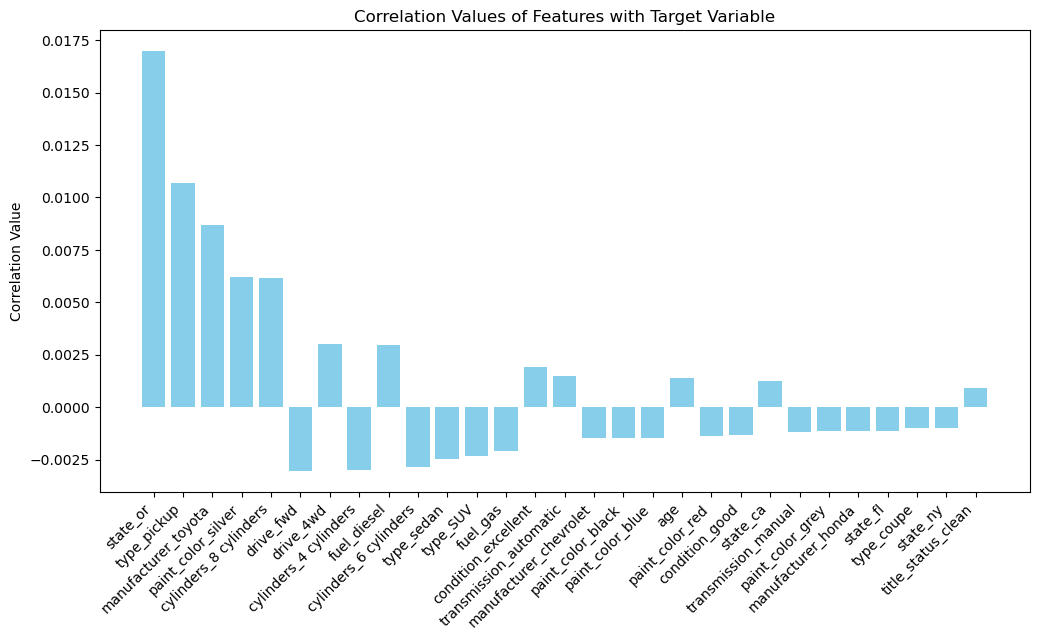

In [133]:
import matplotlib.pyplot as plt


correlation_values = {
    'state_or': 0.016964759448992766,
    'type_pickup': 0.010711317790670132,
    'manufacturer_toyota': 0.008672452033204008,
    'paint_color_silver': 0.0062293610035116815,
    'cylinders_8 cylinders': 0.006175440956319843,
    'drive_fwd': -0.003042346651100483,
    'drive_4wd': 0.003041150750802849,
    'cylinders_4 cylinders': -0.0029825188543747974,
    'fuel_diesel': 0.0029784869921228798,
    'cylinders_6 cylinders': -0.0028399463551590093,
    'type_sedan': -0.002472168765442453,
    'type_SUV': -0.0023040377564990853,
    'fuel_gas': -0.002089689135214673,
    'condition_excellent': 0.0019114359843327015,
    'transmission_automatic': 0.0015063182090322028,
    'manufacturer_chevrolet': -0.0014624835020163587,
    'paint_color_black': -0.0014431128535074573,
    'paint_color_blue': -0.0014376071573015481,
    'age': 0.0013972407187957414,
    'paint_color_red': -0.0013519426307516788,
    'condition_good': -0.00131787076124797,
    'state_ca': 0.0012631883562631212,
    'transmission_manual': -0.0011713631509450572,
    'paint_color_grey': -0.001131399656739479,
    'manufacturer_honda': -0.001117082141159563,
    'state_fl': -0.0011132964310634653,
    'type_coupe': -0.0009761376022374137,
    'state_ny': -0.0009571815913602098,
    'title_status_clean': 0.0009229826224537338
}

# Convert the dictionary items into separate lists for plotting
features = list(correlation_values.keys())
values = list(correlation_values.values())

# Plot the results
plt.figure(figsize=(12, 6))
plt.bar(features, values, color='skyblue')
plt.xticks(rotation=45, ha='right', fontsize=10)  
plt.ylabel('Correlation Value')
plt.title('Correlation Values of Features with Target Variable')
plt.show()


In [162]:
import pandas as pd


feature_names = ['state_or', 'type_pickup', 'manufacturer_toyota', 'paint_color_silver', 'cylinders_8 cylinders',
                 'drive_fwd', 'drive_4wd', 'cylinders_4 cylinders', 'fuel_diesel', 'cylinders_6 cylinders',
                 'type_sedan', 'type_SUV', 'fuel_gas', 'condition_excellent', 'transmission_automatic',
                 'manufacturer_chevrolet', 'paint_color_black', 'paint_color_blue', 'age', 'paint_color_red',
                 'condition_good', 'state_ca', 'transmission_manual', 'paint_color_grey', 'manufacturer_honda',
                 'state_fl', 'type_coupe', 'state_ny', 'title_status_clean']

corr_co = [0.016965, 0.010711, 0.008672, 0.006229, 0.006175, 0.003042, 0.003041, 0.002983, 0.002978, 0.002840,
                0.002472, 0.002304, 0.002090, 0.001911, 0.001506, 0.001462, 0.001443, 0.001438, 0.001397, 0.001352,
                0.001318, 0.001263, 0.001171, 0.001131, 0.001117, 0.001113, 0.000976, 0.000957, 0.000923]


correl = pd.Series(corr_co, index=feature_names, name='Corr Coefficients')


scaled_feature_importance = correl / feature_importance.sum()

# Print the scaled results
print(scaled_feature_importance)
print(feature_importance.sum())


state_or                  0.212970
type_pickup               0.134461
manufacturer_toyota       0.108864
paint_color_silver        0.078196
cylinders_8 cylinders     0.077518
drive_fwd                 0.038188
drive_4wd                 0.038175
cylinders_4 cylinders     0.037447
fuel_diesel               0.037384
cylinders_6 cylinders     0.035652
type_sedan                0.031032
type_SUV                  0.028923
fuel_gas                  0.026237
condition_excellent       0.023990
transmission_automatic    0.018906
manufacturer_chevrolet    0.018353
paint_color_black         0.018115
paint_color_blue          0.018052
age                       0.017537
paint_color_red           0.016972
condition_good            0.016546
state_ca                  0.015855
transmission_manual       0.014700
paint_color_grey          0.014198
manufacturer_honda        0.014022
state_fl                  0.013972
type_coupe                0.012252
state_ny                  0.012014
title_status_clean  

In [161]:
feature_names = list(correlation_values.keys())

cars4 = cars3[feature_names].copy()
cars4.head()

,state_or,type_pickup,manufacturer_toyota,paint_color_silver,cylinders_8 cylinders,drive_fwd,drive_4wd,cylinders_4 cylinders,fuel_diesel,cylinders_6 cylinders,...,paint_color_red,condition_good,state_ca,transmission_manual,paint_color_grey,manufacturer_honda,state_fl,type_coupe,state_ny,title_status_clean
31,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
32,False,True,False,False,True,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,True
33,False,True,False,True,False,False,True,False,False,True,...,False,True,False,False,False,False,False,False,False,True
34,False,False,True,False,False,False,True,False,False,True,...,False,False,False,False,True,False,False,False,False,True
35,False,True,False,False,False,False,True,False,False,True,...,True,True,False,False,False,False,False,False,False,True


In [151]:
X = cars4
y = cars3['price']

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [152]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_test = X_train.align(X_test, join='outer', axis=1, fill_value=0)

In [153]:

alphas = [10, 100, 1000]

#from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso(max_iter=20000)
param_grid = {'alpha': [1, 10, 100, 1000]}
grid_search = GridSearchCV(lasso, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

print("Best Alpha:", grid_search.best_params_['alpha'])
print("Best Negative Mean Squared Error:", grid_search.best_score_)


Best Alpha: 1000
Best Negative Mean Squared Error: -162804538067422.03


In [160]:
best_lasso_model = grid_search.best_estimator_

# Extract coefficients and feature names
coefficients = best_lasso_model.coef_
feature_names = X_train.columns


coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort coefficients_df by absolute values of coefficients in descending order
sorted_coefficients_df = coefficients_df.reindex(coefficients_df['Coefficient'].abs().sort_values(ascending=False).index)

# Print or display the sorted DataFrame
sorted_coefficients_df.head(7)


,Feature,Coefficient
0,state_or,1.472805e+06
1,type_pickup,4.450095e+05
2,manufacturer_toyota,4.189911e+05
3,paint_color_silver,2.500048e+05
4,cylinders_8 cylinders,1.838606e+05
8,fuel_diesel,1.421296e+05
12,fuel_gas,8.497030e+04


In [156]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# RFE selected the same features as Lasso, lending credibility that these are the most important features 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = LinearRegression() 

# Set up RFE with the chosen model
rfe = RFE(model, n_features_to_select=7)  

# Fit RFE on the training data
rfe.fit(X_train_scaled, y_train)

# Extract the selected features
selected_features = X.columns[rfe.support_]

# Print or display the selected features
print("Selected Features:", selected_features)


Selected Features: Index(['state_or', 'type_pickup', 'manufacturer_toyota', 'paint_color_silver',
       'cylinders_8 cylinders', 'fuel_diesel', 'fuel_gas'],
      dtype='object')


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

The resulting MSE of my Lasso model, a measure of predictive accuracy, was found to be extremely large, suggesting that the model's predictions significantly deviated from the actual used car prices. This raises concerns about the reliability of the current model. Considering the unexpectedly large MSE, it is evident that the model requires revisitation. We plan to explore alternative algorithms, fine-tune hyperparameters, and consider more advanced feature engineering techniques to improve predictive performance.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

Dear Dealership owners,

I am pleased to share with you some insights from our recent analysis of the used car price prediction model. The Lasso model has identified several key features that significantly influence car prices, along with their respective coefficients. Here are the top features and their coefficients:

State:
Feature: state_or
Coefficient: 1.47 

Vehicle Type:
Feature: type_pickup
Coefficient: 0.45 

Manufacturer:
Feature: manufacturer_toyota
Coefficient: 0.42

Paint Color:
Feature: paint_color_silver
Coefficient: 0.25

Cylinders:
Feature: cylinders_8 cylinders
Coefficient: 0.18

Fuel Type - Diesel:
Feature: fuel_diesel
Coefficient: 0.14

Fuel Type - Gas:
Feature: fuel_gas
Coefficient: 0.08

In looking at these coefficients, by far the most valuable feature is whether the car was sold in the state of Oregon. Based on this finding, it might be advantageous to sell more cars in Oregon, as you will receive the highest price. Next, pickup trucks have a large influence on the price, indicating that it might be wise to purchase more pickup trucks, as they have the highest resale potential of all the types of cars. Third, Toyota's have a positive influence on price, indicating that purchasing more Toyotas will allow you to profit from their resale. Silver paint, 8 cylinder engines, and diesel type fuel also have significant positive correlations. 

I recommend filtering possible car purchases by these features in order to build an inventory that has the highest possible resale value. 
